In [ ]:
from classy import Class


Used warmup.ipynb from class github page for reference

In [3]:
# create Lambda CDM Class
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075, 'YHe':0.25})
LambdaCDM.set({'output':'mPk','lensing':'no','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [4]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

In [13]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LCDM = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_LCDM.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [7]:
# create Lambda CDM with baryons substituted for DM Class
LambdaCDM_DM = Class()
# pass input parameters
LambdaCDM_DM.set({'omega_b':0.02238280*0.05,'omega_cdm':0.1201075+(0.0223828*0.95), 'YHe':0.25})
LambdaCDM_DM.set({'output':'mPk','lensing':'no','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM_DM.compute()

In [16]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_DM = [] # P(k) in (Mpc/h)**3
h = LambdaCDM_DM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_DM.append(LambdaCDM_DM.pk(k*h,0.)*h**3) # function .pk(k,z)

In [10]:
# create Lambda CDM with 99% of DM subbed for baryonic matter
LambdaCDM_bary = Class()
# pass input parameters
LambdaCDM_bary.set({'omega_b':0.0223828+(0.99*0.1201075),'omega_cdm':0.1201075*0.01, 'YHe':0.25})
LambdaCDM_bary.set({'output':'mPk','lensing':'no','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM_bary.compute()

In [19]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_bary = [] # P(k) in (Mpc/h)**3
h = LambdaCDM_bary.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk_bary.append(LambdaCDM_bary.pk(k*h,0.)*h**3) # function .pk(k,z)

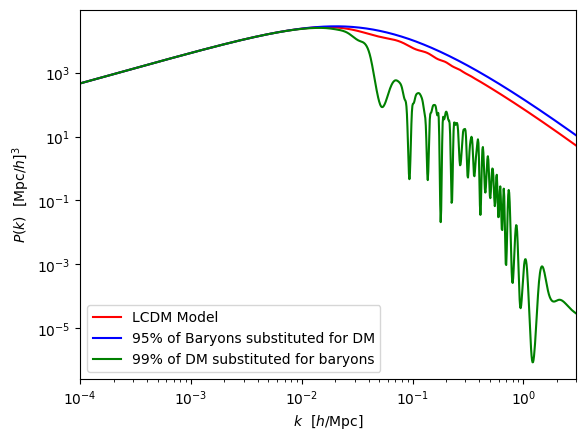

In [22]:
# plot P(k)
plt.figure(4)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk_LCDM,'r-', label="LCDM Model")
plt.plot(kk,Pk_DM,'b-', label="95% of Baryons substituted for DM")
plt.plot(kk,Pk_bary,'g-', label="99% of DM substituted for baryons")
plt.legend()
